# Presentación Proyecto Minería de Datos
### Estudiantes: Lucas Purcell, Daniel Hidalgo y Sebastián Venegas

In [44]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

from sklearn import preprocessing

import warnings
warnings.filterwarnings("ignore")

In [45]:
students_and_addiction = pd.read_csv("Students Social Media Addiction.csv")


Veamos si el dataset tiene datos nulos

In [46]:
students_and_addiction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Student_ID                    705 non-null    int64  
 1   Age                           705 non-null    int64  
 2   Gender                        705 non-null    object 
 3   Academic_Level                705 non-null    object 
 4   Country                       705 non-null    object 
 5   Avg_Daily_Usage_Hours         705 non-null    float64
 6   Most_Used_Platform            705 non-null    object 
 7   Affects_Academic_Performance  705 non-null    object 
 8   Sleep_Hours_Per_Night         705 non-null    float64
 9   Mental_Health_Score           705 non-null    int64  
 10  Relationship_Status           705 non-null    object 
 11  Conflicts_Over_Social_Media   705 non-null    int64  
 12  Addicted_Score                705 non-null    int64  
dtypes: fl

In [47]:
students_and_addiction.describe()

,Student_ID,Age,Avg_Daily_Usage_Hours,Sleep_Hours_Per_Night,Mental_Health_Score,Conflicts_Over_Social_Media,Addicted_Score
count,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000
mean,353.000000,20.659574,4.918723,6.868936,6.226950,2.849645,6.436879
std,203.660256,1.399217,1.257395,1.126848,1.105055,0.957968,1.587165
min,1.000000,18.000000,1.500000,3.800000,4.000000,0.000000,2.000000
25%,177.000000,19.000000,4.100000,6.000000,5.000000,2.000000,5.000000
50%,353.000000,21.000000,4.800000,6.900000,6.000000,3.000000,7.000000
75%,529.000000,22.000000,5.800000,7.700000,7.000000,4.000000,8.000000
max,705.000000,24.000000,8.500000,9.600000,9.000000,5.000000,9.000000


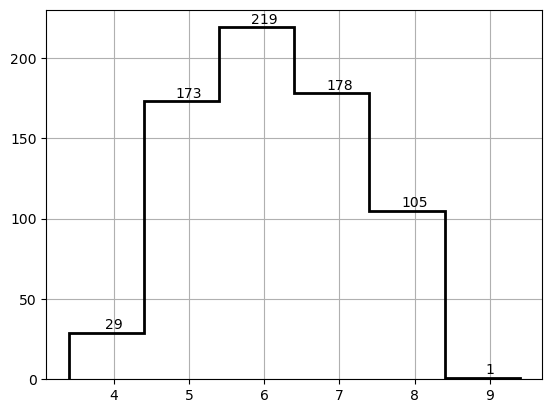

In [48]:
bins = plt.hist(students_and_addiction["Mental_Health_Score"], bins=6,
                histtype='step', linewidth=2, color='blue', edgecolor='black')
for i in range(len(bins[0])):
    plt.text(bins[1][i] + 0.5, bins[0][i] + 0.5, str(int(bins[0][i])),
             ha='center', va='bottom')
plt.xticks([bins[1][i] + 0.5 for i in range(len(bins[0]))],
           labels=["4", "5", "6", "7", "8", "9"])
plt.grid()

<Axes: >

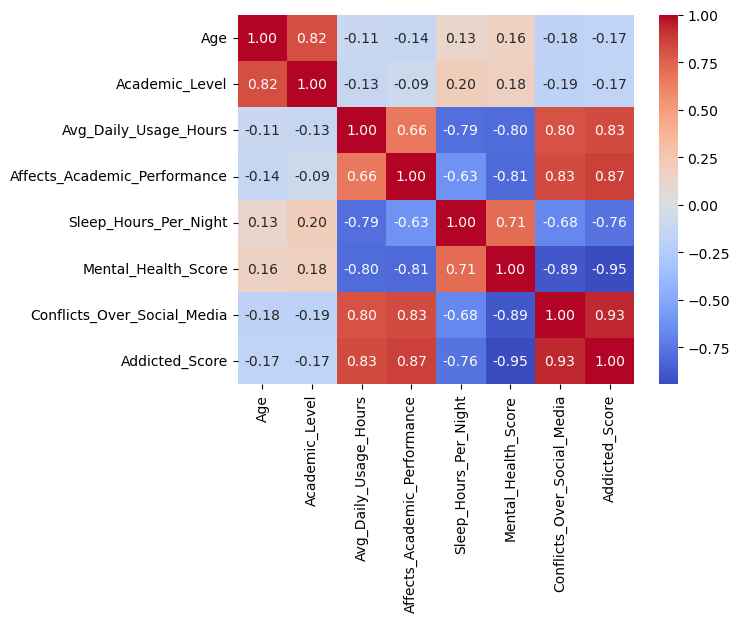

In [49]:
import seaborn as sns


students_and_addiction_copy = students_and_addiction.copy()
students_and_addiction_copy.replace("Yes", 1, inplace=True)
students_and_addiction_copy.replace("No", 0, inplace=True)

"""
Academic Level puede ser descrito como categórico ordinal pero
puede ser redundante. Correlaciona con la Edad que quizás da más información.
"""

students_and_addiction_copy.replace("High School", 0, inplace=True)
students_and_addiction_copy.replace("Undergraduate", 1, inplace=True)
students_and_addiction_copy.replace("Graduate", 2, inplace=True)

cols = ["Student_ID", "Gender", "Country", 
        "Most_Used_Platform", "Relationship_Status"]
students_and_addiction_copy2 = students_and_addiction_copy.drop(cols, axis = 1)

corr = students_and_addiction_copy2.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')

Entonces vemos que hay una correlación entre Avg_Daily_Usage_Hours y Mental_Health_Score, donde ambas variables son inversamente proporcionales. A su vez Addicted_Score es inversamente proporcional a Mental_Health_Score. Por ende al menos en base mientras mayor sea la adicción o la cantidad de horas que se invierten al día en redes sociales, menor será la salud mental

In [50]:
students_and_addiction["Country"].unique()

array(['Bangladesh', 'India', 'USA', 'UK', 'Canada', 'Australia',
       'Germany', 'Brazil', 'Japan', 'South Korea', 'France', 'Spain',
       'Italy', 'Mexico', 'Russia', 'China', 'Sweden', 'Norway',
       'Denmark', 'Netherlands', 'Belgium', 'Switzerland', 'Austria',
       'Portugal', 'Greece', 'Ireland', 'New Zealand', 'Singapore',
       'Malaysia', 'Thailand', 'Vietnam', 'Philippines', 'Indonesia',
       'Taiwan', 'Hong Kong', 'Turkey', 'Israel', 'UAE', 'Egypt',
       'Morocco', 'South Africa', 'Nigeria', 'Kenya', 'Ghana',
       'Argentina', 'Chile', 'Colombia', 'Peru', 'Venezuela', 'Ecuador',
       'Uruguay', 'Paraguay', 'Bolivia', 'Costa Rica', 'Panama',
       'Jamaica', 'Trinidad', 'Bahamas', 'Iceland', 'Finland', 'Poland',
       'Romania', 'Hungary', 'Czech Republic', 'Slovakia', 'Croatia',
       'Serbia', 'Slovenia', 'Bulgaria', 'Estonia', 'Latvia', 'Lithuania',
       'Ukraine', 'Moldova', 'Belarus', 'Kazakhstan', 'Uzbekistan',
       'Kyrgyzstan', 'Tajikistan', 'A

Definimos la variables X y la variable que queremos explicar (Mental_Health_Score)

In [140]:
students_and_addiction_copy = students_and_addiction.copy()
students_and_addiction_copy.replace("Yes", 1, inplace=True)
students_and_addiction_copy.replace("No", 0, inplace=True)

"""
Academic Level puede ser descrito como categórico ordinal pero
puede ser redundante. Correlaciona con la Edad que quizás da más información.
"""

students_and_addiction_copy.replace("High School", 0, inplace=True)
students_and_addiction_copy.replace("Undergraduate", 1, inplace=True)
students_and_addiction_copy.replace("Graduate", 2, inplace=True)

X = students_and_addiction_copy.drop(["Mental_Health_Score", "Student_ID"], axis=1)
y = students_and_addiction_copy["Mental_Health_Score"]

# Codificación
dummy_columns = ["Gender", "Country", "Most_Used_Platform",
                 "Relationship_Status"]
one_hot_encoded = pd.get_dummies(X, columns=dummy_columns)

X_encoded = one_hot_encoded
print(one_hot_encoded)

X_encoded.replace("Yes", 1, inplace=True)
X_encoded.replace("No", 0, inplace=True)
X_encoded.replace("High School", 0, inplace=True)
X_encoded.replace("Undergraduate", 1, inplace=True)
X_encoded.replace("Graduate", 2, inplace=True)


X_encoded = X_encoded.astype(int)

min_max_scaler = preprocessing.MinMaxScaler()
X_scaled = min_max_scaler.fit_transform(X_encoded)
X_scaled

     Age  Academic_Level  Avg_Daily_Usage_Hours  Affects_Academic_Performance  \
0     19               1                    5.2                             1   
1     22               2                    2.1                             0   
2     20               1                    6.0                             1   
3     18               0                    3.0                             0   
4     21               2                    4.5                             1   
..   ...             ...                    ...                           ...   
700   20               1                    4.7                             0   
701   23               2                    6.8                             1   
702   21               1                    5.6                             1   
703   24               2                    4.3                             0   
704   19               1                    6.2                             1   

     Sleep_Hours_Per_Night 

array([[0.16666667, 0.5       , 0.57142857, ..., 0.        , 1.        ,
        0.        ],
       [0.66666667, 1.        , 0.14285714, ..., 0.        , 0.        ,
        1.        ],
       [0.33333333, 0.5       , 0.71428571, ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.5       , 0.5       , 0.57142857, ..., 0.        , 1.        ,
        0.        ],
       [1.        , 1.        , 0.42857143, ..., 0.        , 0.        ,
        1.        ],
       [0.16666667, 0.5       , 0.71428571, ..., 0.        , 0.        ,
        1.        ]])

# Clusterización

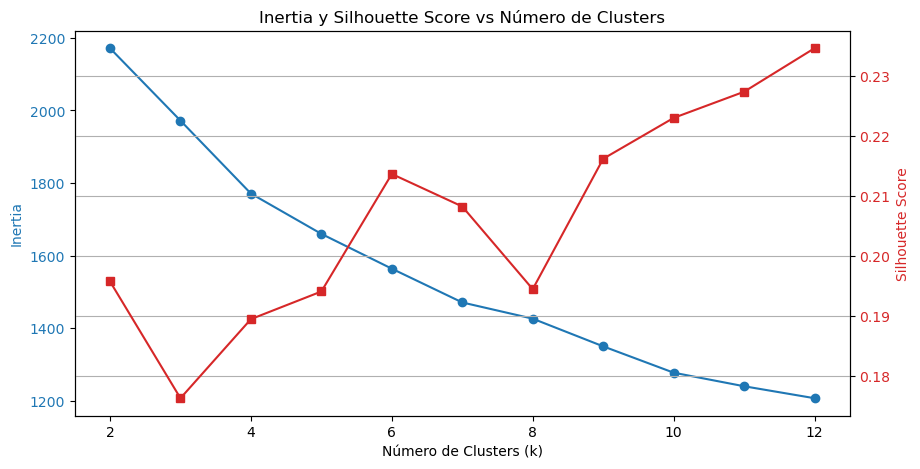

El mejor número de clusters (k) es: 12


In [141]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


inertia = []
silhouette_scores = []
k_range = range(2, 13)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)

    inertia.append(kmeans.inertia_)
    score = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append(score)

fig, ax1 = plt.subplots(figsize=(10, 5))
color = 'tab:blue'
ax1.set_xlabel('Número de Clusters (k)')
ax1.set_ylabel('Inertia', color=color)
ax1.plot(k_range, inertia, marker='o', color=color, label='Inertia')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Silhouette Score', color=color)
ax2.plot(k_range, silhouette_scores, marker='s', color=color,
         label='Silhouette Score')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Inertia y Silhouette Score vs Número de Clusters')
plt.grid(True)
plt.show()

best_k = silhouette_scores.index(max(silhouette_scores)) + 2
print(f"El mejor número de clusters (k) es: {best_k}")

In [142]:
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10, max_iter=300)
clusters = kmeans.fit_predict(X_scaled)

students_and_addiction["Cluster"] = clusters

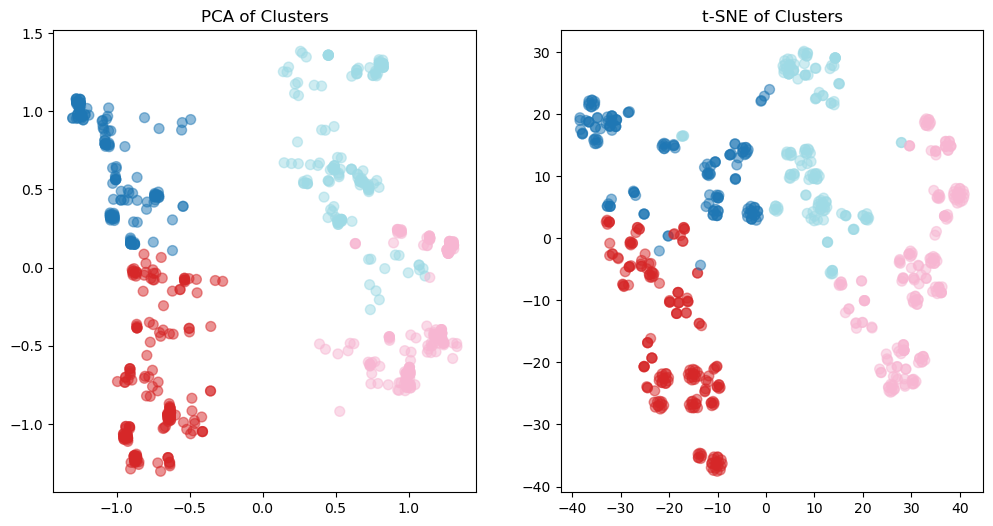

In [143]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=students_and_addiction["Cluster"],
            cmap='tab20', s=50, alpha=0.5)
plt.title('PCA of Clusters')
plt.subplot(1, 2, 2)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=students_and_addiction["Cluster"],
            cmap='tab20', s=50, alpha=0.5)
plt.title('t-SNE of Clusters')
plt.show()

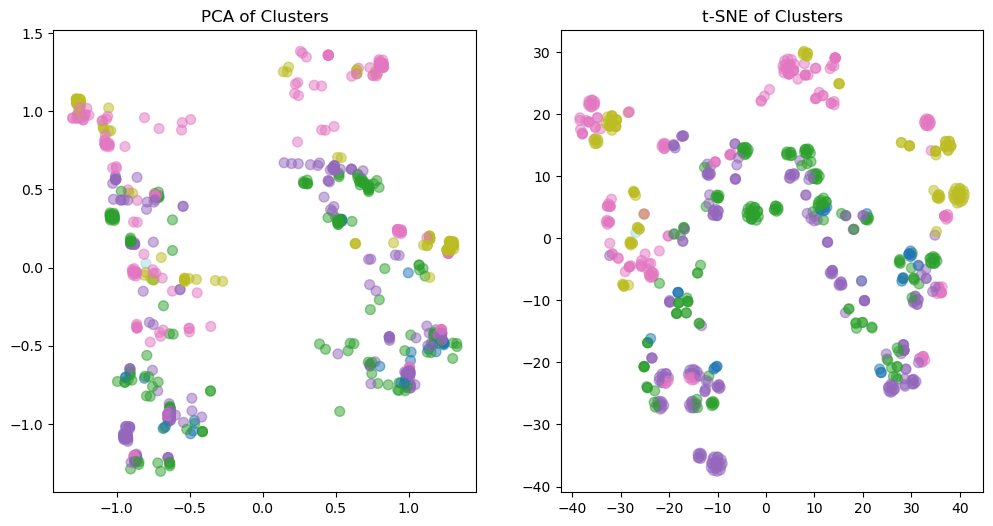

In [144]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=students_and_addiction["Mental_Health_Score"],
            cmap='tab20', s=50, alpha=0.5)
plt.title('PCA of Clusters')
plt.subplot(1, 2, 2)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=students_and_addiction["Mental_Health_Score"],
            cmap='tab20', s=50, alpha=0.5)
plt.title('t-SNE of Clusters')
plt.show()

Número de clusters encontrados: 2
Puntos considerados como 'ruido': 224


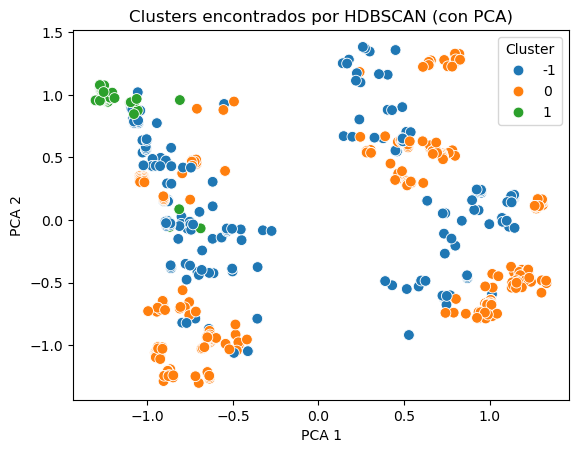

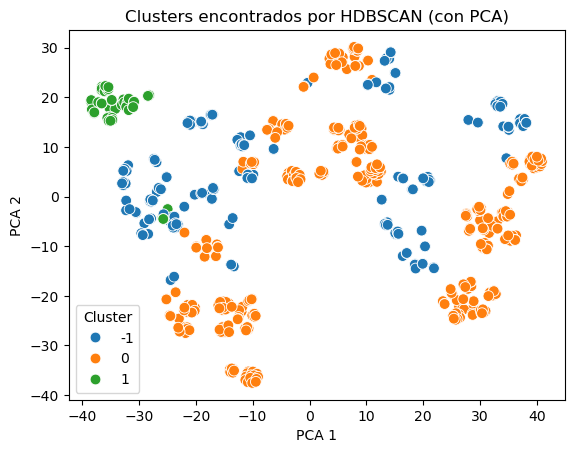

In [145]:
import hdbscan


clusterer = hdbscan.HDBSCAN(min_cluster_size=20, prediction_data=True)
cluster_labels = clusterer.fit_predict(X_scaled)


print("Número de clusters encontrados:", len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0))
print("Puntos considerados como 'ruido':", sum(cluster_labels == -1))

students_and_addiction["Cluster"] = cluster_labels

sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=cluster_labels, palette="tab10", s=60)
plt.title("Clusters encontrados por HDBSCAN (con PCA)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(title="Cluster")
plt.show()

sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=cluster_labels, palette="tab10", s=60)
plt.title("Clusters encontrados por HDBSCAN (con PCA)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(title="Cluster")
plt.show()

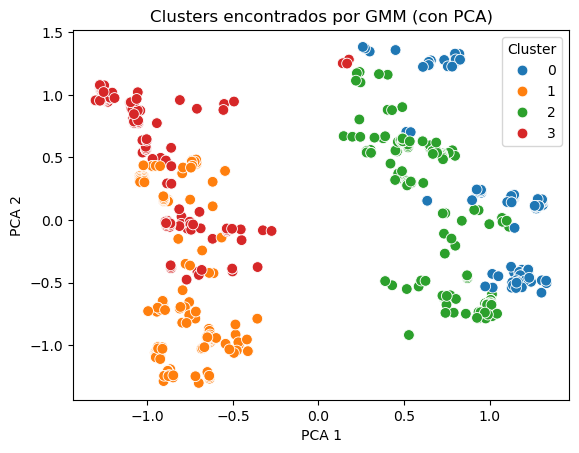

In [146]:
from sklearn.mixture import GaussianMixture


gmm = GaussianMixture(n_components=4, random_state=42)
gmm.fit(X_scaled)
gmm_labels = gmm.predict(X_scaled)
students_and_addiction["GMM_Cluster"] = gmm_labels
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=gmm_labels, palette="tab10", s=60)
plt.title("Clusters encontrados por GMM (con PCA)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(title="Cluster")
plt.show()

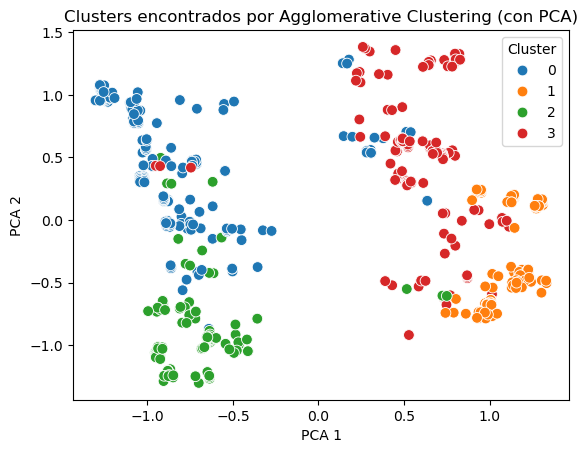

In [147]:
from sklearn.cluster import AgglomerativeClustering


agglo = AgglomerativeClustering(n_clusters=4)
agglo_labels = agglo.fit_predict(X_scaled)
students_and_addiction["Agglo_Cluster"] = agglo_labels
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=agglo_labels, palette="tab10", s=60)
plt.title("Clusters encontrados por Agglomerative Clustering (con PCA)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(title="Cluster")
plt.show()

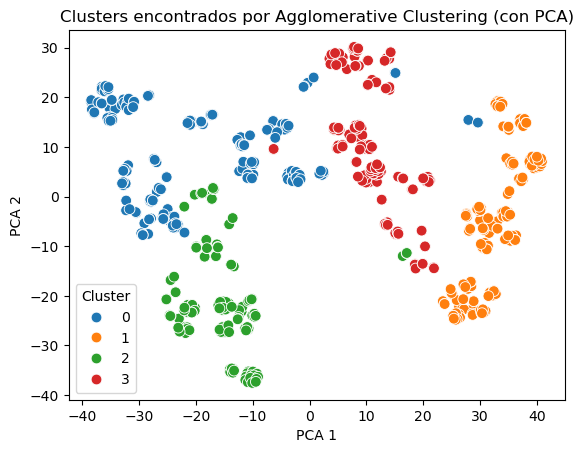

In [148]:
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=agglo_labels, palette="tab10", s=60)
plt.title("Clusters encontrados por Agglomerative Clustering (con PCA)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(title="Cluster")
plt.show()

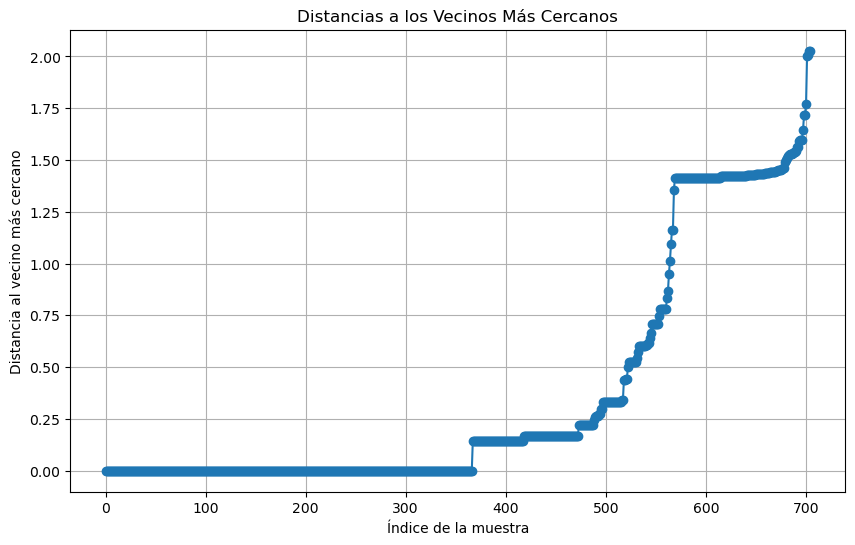

In [149]:
from sklearn.neighbors import NearestNeighbors


nbrs = NearestNeighbors(n_neighbors=3, algorithm='auto').fit(X_scaled)
distances, indices = nbrs.kneighbors(X_scaled)

plt.figure(figsize=(10, 6))
plt.plot(sorted(distances[:, 1]), marker='o')
plt.title('Distancias a los Vecinos Más Cercanos')
plt.xlabel('Índice de la muestra')
plt.ylabel('Distancia al vecino más cercano')
plt.grid()
plt.show()


(array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9]), array([551,  12,  14,  18,  20,  10,  18,  13,  18,  18,  13]))


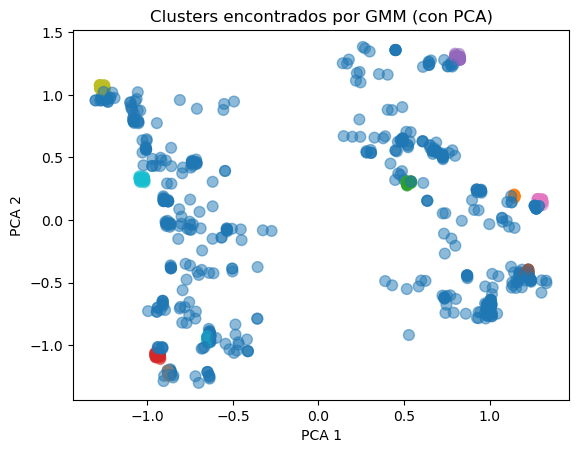

In [150]:
from sklearn.cluster import DBSCAN

# Look for the elbow in the k-distance plot, and use that as eps
dbscan = DBSCAN(eps=0.23, min_samples=10)
labels = dbscan.fit_predict(X_scaled)
print(np.unique(labels, return_counts=True))

plt.scatter(x=X_pca[:, 0], y=X_pca[:, 1], c=labels, cmap="tab10", s=60, alpha=0.5)
plt.title("Clusters encontrados por GMM (con PCA)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()


# Predicciones

In [151]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y,
                                                    test_size=0.2,
                                                    random_state=42)

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))

print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))


Reporte de clasificación:
              precision    recall  f1-score   support

           4       0.75      0.75      0.75         4
           5       0.97      0.95      0.96        38
           6       0.98      0.98      0.98        41
           7       0.97      1.00      0.99        38
           8       0.95      1.00      0.97        19
           9       0.00      0.00      0.00         1

    accuracy                           0.96       141
   macro avg       0.77      0.78      0.77       141
weighted avg       0.96      0.96      0.96       141

Matriz de confusión:
[[ 3  1  0  0  0  0]
 [ 1 36  1  0  0  0]
 [ 0  0 40  1  0  0]
 [ 0  0  0 38  0  0]
 [ 0  0  0  0 19  0]
 [ 0  0  0  0  1  0]]


# New

In [152]:
from sklearn.decomposition import PCA

# Aplica PCA para reducir la dimensionalidad
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_scaled)

print(f"Varianza explicada por las 10 componentes: {pca.explained_variance_ratio_.sum():.2f}")


Varianza explicada por las 10 componentes: 0.72


In [153]:
import hdbscan

# Ajustar HDBSCAN (ajusta min_cluster_size si es necesario)
clusterer = hdbscan.HDBSCAN(min_cluster_size=20)
labels = clusterer.fit_predict(X_pca)

# Número de clusters (excluyendo ruido)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print(f"Número de clusters encontrados: {n_clusters}")


Número de clusters encontrados: 11


In [154]:
# Agrega las etiquetas de cluster al DataFrame original
students_and_addiction["Cluster_HDBSCAN"] = labels
one_hot_encoded["Cluster_HDBSCAN"] = labels

# Calcula estadísticas por cluster
summary = students_and_addiction.groupby("Cluster_HDBSCAN").mean(numeric_only=True)

# Ordena por score promedio de salud mental
summary = summary.sort_values("Mental_Health_Score", ascending=False)

print(summary[["Mental_Health_Score"]])  # Puedes agregar más columnas si quieres


                 Mental_Health_Score
Cluster_HDBSCAN                     
 5                          7.812500
 6                          7.480000
 0                          7.200000
 7                          6.297872
-1                          6.296154
 8                          6.000000
 1                          5.888889
 9                          5.810811
 10                         5.744681
 4                          5.482759
 2                          5.289474
 3                          4.954545


In [155]:
# Porcentaje de estudiantes por género en cada cluster
gender_dist = one_hot_encoded.groupby("Cluster_HDBSCAN")["Gender_Male"].mean()
print(gender_dist)

Cluster_HDBSCAN
-1     0.561538
 0     0.000000
 1     0.000000
 2     0.000000
 3     0.000000
 4     0.000000
 5     0.000000
 6     1.000000
 7     1.000000
 8     1.000000
 9     1.000000
 10    1.000000
Name: Gender_Male, dtype: float64


In [156]:
import numpy as np

n_noise = np.sum(labels == -1)
print(f"Puntos considerados ruido: {n_noise} de {len(labels)} ({n_noise / len(labels) * 100:.2f}%)")


Puntos considerados ruido: 260 de 705 (36.88%)


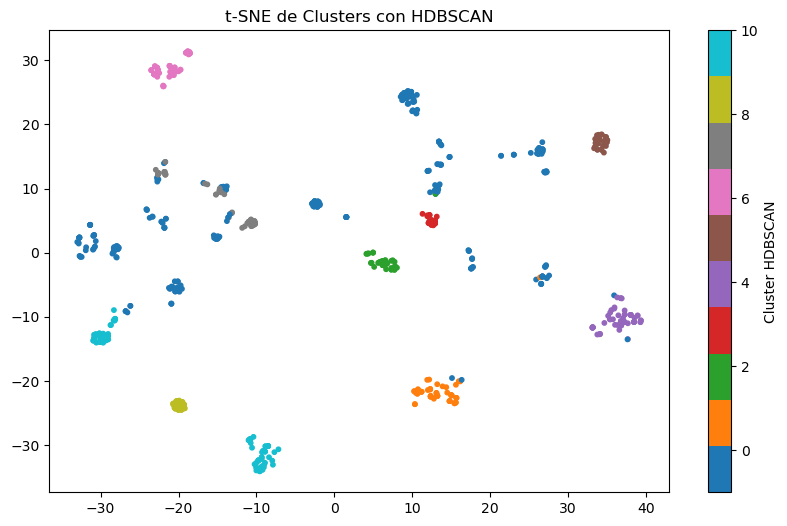

In [157]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Visualización t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X_pca)

plt.figure(figsize=(10, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels, cmap='tab10', s=10)
plt.colorbar(label='Cluster HDBSCAN')
plt.title("t-SNE de Clusters con HDBSCAN")
plt.show()


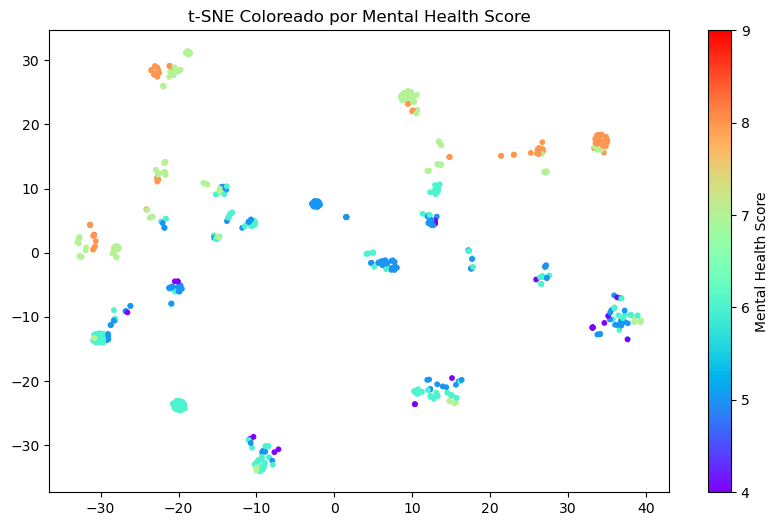

In [158]:
plt.figure(figsize=(10, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='rainbow', s=10)
plt.colorbar(label='Mental Health Score')
plt.title("t-SNE Coloreado por Mental Health Score")
plt.show()


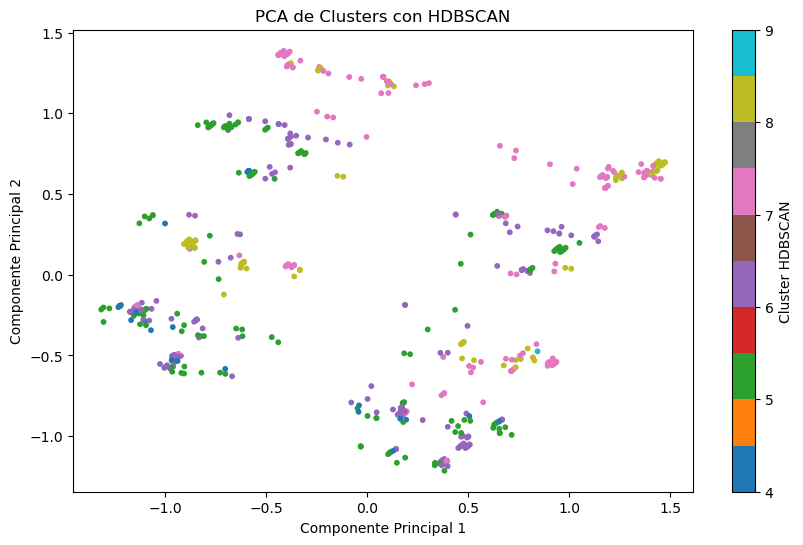

In [130]:
from sklearn.decomposition import PCA

# Aplica PCA para reducir la dimensionalidad
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualiza 2 componentes principales
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='tab10', s=10)
plt.colorbar(label='Cluster HDBSCAN')
plt.title("PCA de Clusters con HDBSCAN")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.show()


In [134]:
# Convertimos a float para evitar errores de división
X_encoded_float = X_encoded.astype(float)

import gower
from sklearn.cluster import AgglomerativeClustering

# Calculamos matriz de distancias Gower
gower_dist = gower.gower_matrix(X_encoded_float)

# Clustering jerárquico con distancias precomputadas
agg = AgglomerativeClustering(n_clusters=4, affinity='precomputed', linkage='average')
labels = agg.fit_predict(gower_dist)

# Guardamos los clusters
students_and_addiction['Cluster_Gower'] = labels

